In [40]:
#pip install scikit-learn

In [41]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

# Part I: Different Model Specs

A. Regression without regularization

In [42]:
myData = pd.read_csv("/content/Hitters.csv")
myData.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [43]:
myData.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [44]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

While cleaning the data I found around 60, N/a values in our predictor variable and decided to drop these rows entirely to ensure that our regressions we run our fair and don't include any Na values.

In [45]:
myData = myData.dropna(subset=['Salary'])

In [46]:
myData.isna().sum()


,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


In [47]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [48]:
lr = LinearRegression()
# Creating X and Y for regression
X = myData.drop('Salary', axis=1)
y = myData['Salary']


In [49]:
# Column Transformer for Step A
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)), # Asked chat what the best way to choose all columns that are categorical and it gave me the funciton make_column_selector
  ],
  remainder = "passthrough"
)
# Pipeline for Step A
lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
# Fitting, scoring, and looking at the coefficients.
lr_pipeline_1.fit(X, y)
lr_pipeline_1.score(X, y)
lr_pipeline_1.named_steps["linear_regression"].coef_


array([-31.29971152,  31.29971152,  58.42462282, -58.42462282,
        12.38116255, -12.38116255,  -1.9798729 ,   7.50076754,
         4.3308829 ,  -2.37620998,  -1.04496196,   6.23128632,
        -3.48905426,  -0.17134047,   0.13399096,  -0.17286107,
         1.45430494,   0.8077088 ,  -0.81157091,   0.28189251,
         0.37106921,  -3.36076048])

In [50]:
# I wanted a better way to look at the coefficients so I asked chat for functions that could help me create a dataframe
# Chat told me to use the get_feature_names_out funciton and the named_steps function
feature_names = lr_pipeline_1.named_steps["preprocessing"].get_feature_names_out()
coefficients = lr_pipeline_1.named_steps["linear_regression"].coef_
# I then created a table of the coefficinets and sorted them by largest to smallest
coef_table = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

coef_table

,Feature,Coefficient
2,dummify__Division_E,58.424623
1,dummify__League_N,31.299712
4,dummify__NewLeague_A,12.381163
7,remainder__Hits,7.500768
11,remainder__Walks,6.231286
8,remainder__HmRun,4.330883
16,remainder__CRuns,1.454305
17,remainder__CRBI,0.807709
20,remainder__Assists,0.371069
19,remainder__PutOuts,0.281893


Takeaways from coefficients:

- For the League categorical variable that we split into dummy variables, the coefficient of 58.42 is the largest coefficient we have and shows that a player, who ended the 1986 season in the National League is expected to have a salary almost $60000 larger than a player ending the season as an American league player according to our regression.

- Also, our coefficient of 31 for our East division, which comes from our divisional categorical variable that was split into dummy variables, shows that players ending 1986 on an East division team are expected to have a salary of around $31000 larger than players ending on a West division team.

- Looking at our numeric variables both hits, walks, and home-runs have rather large impacts especially hits as we predict salary to go up around $7500 for each additional hit by a player in 1986.

- A strange coefficient we have is Runs as the coefficinet is -2.3 which means for each additional run a player scored in 1986 we precict salary to go down $2,000 dollars, which doesn't make full sense and shows there may be potential multicollinearity in the dataset.

In [51]:
# Running cross validation on the pipeline and finding the mean MSE score.
mse_scores = -cross_val_score(lr_pipeline_1, X, y, cv=5, scoring='neg_mean_squared_error')

mean_mse = np.mean(mse_scores)
mean_mse

np.float64(121136.31031816851)

B. Ridge regression

In [56]:
# Column Transformer for Ridge Regression
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number)) # Used make_column_selector again but this time including all numerical columns from the data
  remainder = "passthrough" )
# Pipeline for Ridge Regression
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=1.0))]
)

In [86]:
alpha_values = [.001,.01, .1, 1, 2, 3, 4, 5, 10, 100]
cv_scores = {}

for alpha in alpha_values:
    ridge_pipeline = Pipeline([
        ("preprocessing", ct),
        ("ridge_regression", Ridge(alpha=alpha))
    ])

    mse = -cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    print(f"alpha={alpha:.3f}| Mean MSE: {mse:.4f}\n")


alpha=0.001| Mean MSE: 121124.4586

alpha=0.010| Mean MSE: 121022.9033

alpha=0.100| Mean MSE: 120343.6211

alpha=1.000| Mean MSE: 119144.4327

alpha=2.000| Mean MSE: 118968.4499

alpha=3.000| Mean MSE: 118941.5719

alpha=4.000| Mean MSE: 118970.1461

alpha=5.000| Mean MSE: 119023.4461

alpha=10.000| Mean MSE: 119348.9848

alpha=100.000| Mean MSE: 120716.4356



From this output, I tested many alpha scores and narrowed it down to find the best alpha is at 3 because it has the smallest mean MSE of all alphas.

In [103]:
# Column Transformer for Ridge Regression
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number)) # Corrected to standardize all numeric features
  ],
  remainder = "passthrough" )
# Pipeline for Ridge Regression
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=3.0))]
)
ridge_pipeline.fit(X, y)
ridge_pipeline.score(X, y)


0.5379273566496316

In [104]:
# I reused the functions chat gave me earlier
feature_names = ridge_pipeline.named_steps["preprocessing"].get_feature_names_out()
coefficients = ridge_pipeline.named_steps["ridge_regression"].coef_
# I then created a table of the coefficinets and sorted them by largest to smallest
coef_table = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

coef_table

,Feature,Coefficient
7,standardize__Hits,241.469885
16,standardize__CRuns,214.277469
14,standardize__CHits,122.154687
17,standardize__CRBI,119.067488
11,standardize__Walks,109.525978
19,standardize__PutOuts,77.823110
2,dummify__Division_E,60.873099
15,standardize__CHmRun,56.905369
20,standardize__Assists,40.427006
1,dummify__League_N,28.769453


Takeaways from coefficients:

- For the League categorical variable that we split into dummy variables, the coefficient of 28.77 shows that a player who ended the 1986 season in the National League is expected to have a salary about $29,000 higher than a player ending the season in the American League according to our ridge regression model.

- Also, our coefficient of 60.87 for the East Division shows that players ending 1986 on an East division team are expected to have a salary of around $61,000 higher than players ending on a West division team, which again matches the same general trend we saw in our earlier OLS model.

- Looking at our numeric variables, both Hits, Walks, and Career Runs (CRuns) have large positive effects on salary. For example, Hits has the largest coefficient at 241, showing that players who had higher hitting performance in 1986 are paid significantly more. Similarly, Walks (109) and CRuns (214) indicate that both on-base ability and cumulative scoring over a career are strongly tied to compensation.

- Lastly, one of our more negative coefficients comes from AtBat (-225), suggesting that once we account for the number of hits, having more at-bats without proportional production may slightly reduce predicted salary. This likely reflects multicollinearity among related performance metrics like hits, at-bats, and runs, which ridge regression helps stabilize by shrinking these effects toward zero.

Overall, our numeric variables now have much larger impacts than our categorical predictors which in this case makes much more intuitive sense as a players statistical performance and career performance should lead to larger impacts on their salary than which division/league they are in.

In [93]:
# Running cross validation on the ridge pipeline and finding the mean MSE score.
mse_scores_ridge = -cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

mean_mse_ridge = np.mean(mse_scores_ridge)
print(f"Mean MSE for Ridge Regression (alpha=3.0): {mean_mse_ridge:.4f}")

Mean MSE for Ridge Regression (alpha=3.0): 118941.5719


C. Lasso Regression

In [97]:

# Column Transformer for Lasso Regression
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough" )

# Pipeline for Lasso Regression
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=1.0))]
)

alpha_values = [.001, .01, .1, 1,1.5, 2, 2.5, 3, 4, 5, 10, 100]
cv_scores = {}

for alpha in alpha_values:
    lasso_pipeline = Pipeline([
        ("preprocessing", ct),
        ("lasso_regression", Lasso(alpha=alpha))
    ])

    mse = -cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    print(f"alpha={alpha:.3f}| Mean MSE: {mse:.4f}\n")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+07, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.984e+06, tolerance: 3.606e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+07, tolerance: 4.137e

alpha=0.001| Mean MSE: 120994.1798

alpha=0.010| Mean MSE: 120964.7647



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.591e+06, tolerance: 4.137e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.471e+05, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.066e+06, tolerance: 4.558e

alpha=0.100| Mean MSE: 120682.2526

alpha=1.000| Mean MSE: 119761.5874

alpha=1.500| Mean MSE: 119509.1061



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.815e+03, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.712e+03, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.130e+03, tolerance: 4.281e

alpha=2.000| Mean MSE: 119137.0289

alpha=2.500| Mean MSE: 119085.7614

alpha=3.000| Mean MSE: 119131.9270

alpha=4.000| Mean MSE: 119778.0835

alpha=5.000| Mean MSE: 120332.3834

alpha=10.000| Mean MSE: 121828.1413

alpha=100.000| Mean MSE: 143755.1624



From this I tested many alphas with Lasso regression and found that the alpha at 2.5 leads to the smallest mean MSE and therefore out best alpha value.

In [100]:
# Column Transformer for Lasso Regression
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough" )

# Pipeline for Lasso Regression
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=2.5))]
)
lasso_pipeline.fit(X_train, y_train)
lasso_pipeline.score(X_test, y_test)

0.2781253515856581

In [107]:
# I reused the functions chat gave me earlier
feature_names = lasso_pipeline.named_steps["preprocessing"].get_feature_names_out()
coefficients = lasso_pipeline.named_steps["lasso_regression"].coef_

# Asked gemini how to get my table to be without scientific notation, not sure why it changed on the lasso regression only
pd.set_option('display.float_format', '{:.4f}'.format)

# I then created a table of the coefficinets and sorted them by largest to smallest
coef_table = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

coef_table

,Feature,Coefficient
7,standardize__Hits,318.5245
16,standardize__CRuns,183.8915
14,standardize__CHits,172.4691
11,standardize__Walks,89.2028
19,standardize__PutOuts,89.0889
15,standardize__CHmRun,76.7636
2,dummify__Division_E,67.2357
8,standardize__HmRun,14.6362
10,standardize__RBI,3.3585
1,dummify__League_N,0.0000


Takeaways from coefficients:

- For the League categorical variable that we split into dummy variables, the coefficient for League_N has been shrunk completely to 0.00, showing that once other predictors are included, whether a player ended the season in the National or American League no longer has a meaningful impact on salary according to our Lasso regression model. This highlights Lasso’s ability to eliminate weaker predictors entirely.

- Our coefficient of 67.23 for the East Division shows that players ending 1986 on an East division team are expected to have a salary of around $67,000 higher than those on a West division team. This consistent pattern across all models suggests that players in the East may benefit from larger markets or higher team payrolls.

- Looking at our numeric variables, Hits, Career Runs (CRuns), and Career Hits (CHits) continue to stand out as the most influential predictors. For example, Hits (318) has the largest positive coefficient, indicating that players with stronger recent hitting performance tend to earn substantially higher salaries. Similarly, CRuns (184) and CHits (172) show that long-term offensive success remains a key driver of player compensation.

- On the negative side, AtBat (-209) and CAtBat (-104) both have relatively large negative coefficients. This implies that once we account for productivity metrics like hits and RBIs, simply accumulating more at-bats—especially without corresponding results—does not lead to higher pay. Likewise, Runs (-56) and Years (-56) have mild negative impacts, suggesting possible diminishing returns for longevity after controlling for performance.

Overall, Lasso regression produced a simpler, more interpretable model by zeroing out weaker predictors while keeping only the strongest contributors to salary. The resulting coefficients emphasize that individual and career offensive performance metrics—particularly hits and career runs—remain the dominant factors influencing player pay, while league affiliation and other secondary variables play little to no role once the model penalizes complexity

In [115]:
# Running cross validation on the ridge pipeline and finding the mean MSE score.
mse_scores_lasso = -cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

mean_mse_lasso = np.mean(mse_scores_lasso)
print(f"Mean MSE for Lasso Regression (alpha=3.0): {mean_mse_lasso:.4f}")

Mean MSE for Lasso Regression (alpha=3.0): 119085.7614


D. Elastic Net

In [111]:

# Column Transformer for Elastic Net Regression
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number)) # Standardize all numeric features
  ],
  remainder = "passthrough"
)

# Pipeline for Elastic Net Regression
elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000))]
)

# I tested a range of alpha and l1_ratio values to tune the model.
alpha_values = [.001, .01, .1, 1, 2, 3, 4, 5, 10,100]
l1_ratios = [0.2, 0.4, 0.5, 0.6, 0.8]
cv_scores = {}

for alpha in alpha_values:
    for l1 in l1_ratios:
        elastic_pipeline = Pipeline([
            ("preprocessing", ct),
            ("elastic_regression", ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=10000))
        ])
        mse = -cross_val_score(elastic_pipeline, X, y, cv=5, scoring='neg_mean_squared_error').mean()
        print(f"alpha={alpha:.3f}, l1_ratio={l1:.2f} | Mean MSE: {mse:.4f}\n")


alpha=0.001, l1_ratio=0.20 | Mean MSE: 120047.4361

alpha=0.001, l1_ratio=0.40 | Mean MSE: 120213.5766

alpha=0.001, l1_ratio=0.50 | Mean MSE: 120313.8245

alpha=0.001, l1_ratio=0.60 | Mean MSE: 120428.9369

alpha=0.001, l1_ratio=0.80 | Mean MSE: 120719.3228

alpha=0.010, l1_ratio=0.20 | Mean MSE: 118995.9381

alpha=0.010, l1_ratio=0.40 | Mean MSE: 119067.2583

alpha=0.010, l1_ratio=0.50 | Mean MSE: 119123.7931

alpha=0.010, l1_ratio=0.60 | Mean MSE: 119204.2408

alpha=0.010, l1_ratio=0.80 | Mean MSE: 119515.7073

alpha=0.100, l1_ratio=0.20 | Mean MSE: 119675.6013

alpha=0.100, l1_ratio=0.40 | Mean MSE: 119496.2985

alpha=0.100, l1_ratio=0.50 | Mean MSE: 119381.3756

alpha=0.100, l1_ratio=0.60 | Mean MSE: 119258.7694

alpha=0.100, l1_ratio=0.80 | Mean MSE: 118994.4279

alpha=1.000, l1_ratio=0.20 | Mean MSE: 121500.8165

alpha=1.000, l1_ratio=0.40 | Mean MSE: 121009.7671

alpha=1.000, l1_ratio=0.50 | Mean MSE: 120775.6854

alpha=1.000, l1_ratio=0.60 | Mean MSE: 120552.7931

alpha=1.000,

From this, the best model comes from an alpha of 0.1 and an l1 ratio of 0.8, since this combination produced the lowest mean MSE out of all the tested values. This means our Elastic Net model leans mostly toward the Lasso penalty, allowing it to perform strong variable selection while still keeping some stability from the Ridge component.


In [112]:
# Column Transformer for Elastic Net Regression
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

# Pipeline for Elastic Net Regression with chosen hyperparameters
elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet(alpha=.1, l1_ratio=0.8))]
)

elastic_pipeline.fit(X, y)
elastic_pipeline.score(X, y)

# I reused the same coefficient extraction and sorting functions I used earlier
feature_names = elastic_pipeline.named_steps["preprocessing"].get_feature_names_out()
coefficients = elastic_pipeline.named_steps["elastic_regression"].coef_

pd.set_option('display.float_format', '{:.4f}'.format)

coef_table = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

coef_table


,Feature,Coefficient
7,standardize__Hits,200.5500
16,standardize__CRuns,163.2162
14,standardize__CHits,110.7593
17,standardize__CRBI,104.7648
11,standardize__Walks,97.5555
19,standardize__PutOuts,76.8132
2,dummify__Division_E,60.7491
15,standardize__CHmRun,59.2611
20,standardize__Assists,34.9828
1,dummify__League_N,26.2381


Takeaways from coefficients:

- For the League categorical variable that we split into dummy variables, the coefficient for League_N is 26.23, showing that a player who ended the 1986 season in the National League is expected to have a salary about 26,000 higher than a player ending the season in the American League according to our Elastic Net regression model. This coefficient is slightly smaller than in the Ridge model, showing the added shrinkage from combining both penalties.

- Our coefficient of 60.75 for the East Division shows that players ending 1986 on an East division team are expected to have a salary of around 61,000 higher than players ending on a West division team. This trend is consistent across all of our previous models, suggesting that players in the East tend to earn more regardless of the regularization method used.

- Looking at our numeric variables, Hits, Career Runs (CRuns), and Career Hits (CHits) continue to have the largest positive effects on salary. For instance, Hits has the highest coefficient at 200, meaning players with stronger hitting performance in 1986 are predicted to have substantially higher salaries. Similarly, CRuns (163) and CHits (111) show that career-long consistency and productivity are also highly valued.

- Walks (97) and PutOuts (77) also have positive effects, though slightly smaller, indicating that on-base ability and defensive involvement still contribute positively to pay but to a lesser degree than hitting performance.

- On the negative side, AtBat (-185) and CWalks (-126) have the largest negative coefficients, showing that higher totals in these areas, without corresponding production, tend to slightly lower salary predictions. Years in the league (-52) and CAtBat (-57) also show mild negative impacts, suggesting diminishing returns for experience when other performance measures are considered.

Overall, the Elastic Net regression creates a balanced model that keeps many of the same influential predictors as Ridge and Lasso while shrinking weaker ones. This balance between variable selection and coefficient stability helps highlight the main drivers of salary—strong offensive performance and long-term productivity—while maintaining a simpler and more stable model.

In [114]:
mse_scores_net = -cross_val_score(elastic_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

mean_mse_net = np.mean(mse_scores_net)
mean_mse_net

np.float64(118994.42787368374)

# Part II. Variable Selection

Based on my results above, I have decided after referring to chat and inputting the four coefficinet tables as well as the MSE for each regression type that for our variable selection:

- Most important: Hits

- Five most important numeric: Hits, CRuns, CHits, Walks, CRbi

- Most important categorical: division

In [123]:
# Fitting all 4 regression types with just hits
X_one = myData[['Hits']]
y = myData['Salary']

# Linear Regression
lr = LinearRegression()
mse_one_lr = -cross_val_score(lr, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()

# Ridge Regression (tuning alpha)
best_mse = np.inf
for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    mse = -cross_val_score(ridge, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()
# Lasso Regression
best_mse = np.inf
for alpha in [0.001, 0.01, 0.1, 1, 10]:
    lasso = Lasso(alpha=alpha)
    mse = -cross_val_score(lasso, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()
# Elastic Net Regression
best_mse = np.inf
for alpha in [0.001, 0.01, 0.1, 1]:
    for l1 in [0.2, 0.5, 0.8]:
        enet = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=10000)
        mse = -cross_val_score(enet, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()


Mean MSE (Linear Regression): 173088.97
Mean MSE (Ridge Regression): 173087.65
Mean MSE (Lasso Regression): 173087.65
Mean MSE (Elastic Net Regression): 173087.65


In [125]:
# Fitting all 4 regression types with just Hits
X_one = myData[['Hits']]
y = myData['Salary']

# Linear Regression
lr = LinearRegression()
mse_one_lr = -cross_val_score(lr, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Linear Regression | Mean MSE: {mse_one_lr:.4f}\n")

# Ridge Regression (tuning alpha)
ridge_results = []
for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    mse = -cross_val_score(ridge, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()
    ridge_results.append({'Model': 'Ridge', 'Alpha': alpha, 'Mean_MSE': mse})
    print(f"Ridge | alpha={alpha} | Mean MSE: {mse:.4f}")

# Lasso Regression
lasso_results = []
for alpha in [0.001, 0.01, 0.1, 1, 10]:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    mse = -cross_val_score(lasso, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()
    lasso_results.append({'Model': 'Lasso', 'Alpha': alpha, 'Mean_MSE': mse})
    print(f"Lasso | alpha={alpha} | Mean MSE: {mse:.4f}")

# Elastic Net Regression
enet_results = []
for alpha in [0.001, 0.01, 0.1, 1]:
    for l1 in [0.2, 0.5, 0.8]:
        enet = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=10000)
        mse = -cross_val_score(enet, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()
        enet_results.append({'Model': 'ElasticNet', 'Alpha': alpha, 'L1_Ratio': l1, 'Mean_MSE': mse})
        print(f"ElasticNet | alpha={alpha}, l1_ratio={l1} | Mean MSE: {mse:.4f}")


Linear Regression | Mean MSE: 173088.9729

Ridge | alpha=0.001 | Mean MSE: 173088.9728
Ridge | alpha=0.01 | Mean MSE: 173088.9726
Ridge | alpha=0.1 | Mean MSE: 173088.9704
Ridge | alpha=1 | Mean MSE: 173088.9484
Ridge | alpha=10 | Mean MSE: 173088.7285
Ridge | alpha=100 | Mean MSE: 173086.5315
Lasso | alpha=0.001 | Mean MSE: 173088.9725
Lasso | alpha=0.01 | Mean MSE: 173088.9693
Lasso | alpha=0.1 | Mean MSE: 173088.9371
Lasso | alpha=1 | Mean MSE: 173088.6158
Lasso | alpha=10 | Mean MSE: 173085.4490
ElasticNet | alpha=0.001, l1_ratio=0.2 | Mean MSE: 173088.9686
ElasticNet | alpha=0.001, l1_ratio=0.5 | Mean MSE: 173088.9701
ElasticNet | alpha=0.001, l1_ratio=0.8 | Mean MSE: 173088.9715
ElasticNet | alpha=0.01, l1_ratio=0.2 | Mean MSE: 173088.9306
ElasticNet | alpha=0.01, l1_ratio=0.5 | Mean MSE: 173088.9451
ElasticNet | alpha=0.01, l1_ratio=0.8 | Mean MSE: 173088.9596
ElasticNet | alpha=0.1, l1_ratio=0.2 | Mean MSE: 173088.5501
ElasticNet | alpha=0.1, l1_ratio=0.5 | Mean MSE: 173088.695

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Fitting all 4 regression types with just Hits
X_one = myData[['Hits']]
y = myData['Salary']

# Linear Regression
lr_pipeline = Pipeline([
    ("standardize", StandardScaler()),
    ("model", LinearRegression())
])
mse_one_lr = -cross_val_score(lr_pipeline, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Linear Regression | Mean MSE: {mse_one_lr:.4f}\n")

# Ridge Regression (tuning alpha)
ridge_results = []
for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    ridge_pipeline = Pipeline([
        ("standardize", StandardScaler()),
        ("model", Ridge(alpha=alpha))
    ])
    mse = -cross_val_score(ridge_pipeline, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()
    ridge_results.append({'Model': 'Ridge', 'Alpha': alpha, 'Mean_MSE': mse})
    print(f"Ridge | alpha={alpha} | Mean MSE: {mse:.4f}")

# Lasso Regression
lasso_results = []
for alpha in [0.001, 0.01, 0.1, 1, 10]:
    lasso_pipeline = Pipeline([
        ("standardize", StandardScaler()),
        ("model", Lasso(alpha=alpha, max_iter=10000))
    ])
    mse = -cross_val_score(lasso_pipeline, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()
    lasso_results.append({'Model': 'Lasso', 'Alpha': alpha, 'Mean_MSE': mse})
    print(f"Lasso | alpha={alpha} | Mean MSE: {mse:.4f}")

# Elastic Net Regression
enet_results = []
for alpha in [0.001, 0.01, 0.1, 1]:
    for l1 in [0.2, 0.5, 0.8]:
        enet_pipeline = Pipeline([
            ("standardize", StandardScaler()),
            ("model", ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=10000))
        ])
        mse = -cross_val_score(enet_pipeline, X_one, y, cv=5, scoring='neg_mean_squared_error').mean()
        enet_results.append({'Model': 'ElasticNet', 'Alpha': alpha, 'L1_Ratio': l1, 'Mean_MSE': mse})
        print(f"ElasticNet | alpha={alpha}, l1_ratio={l1} | Mean MSE: {mse:.4f}")


Linear Regression | Mean MSE: 173088.9729

Ridge | alpha=0.001 | Mean MSE: 173088.9290
Ridge | alpha=0.01 | Mean MSE: 173088.5341
Ridge | alpha=0.1 | Mean MSE: 173084.5960
Ridge | alpha=1 | Mean MSE: 173046.2303
Ridge | alpha=10 | Mean MSE: 172755.9755
Ridge | alpha=100 | Mean MSE: 174448.3087
Lasso | alpha=0.001 | Mean MSE: 173088.9598
Lasso | alpha=0.01 | Mean MSE: 173088.8422
Lasso | alpha=0.1 | Mean MSE: 173087.6760
Lasso | alpha=1 | Mean MSE: 173076.9343
Lasso | alpha=10 | Mean MSE: 173061.6345
ElasticNet | alpha=0.001, l1_ratio=0.2 | Mean MSE: 173081.5304
ElasticNet | alpha=0.001, l1_ratio=0.5 | Mean MSE: 173084.3088
ElasticNet | alpha=0.001, l1_ratio=0.8 | Mean MSE: 173087.0964
ElasticNet | alpha=0.01, l1_ratio=0.2 | Mean MSE: 173017.4588
ElasticNet | alpha=0.01, l1_ratio=0.5 | Mean MSE: 173043.4833
ElasticNet | alpha=0.01, l1_ratio=0.8 | Mean MSE: 173070.3977
ElasticNet | alpha=0.1, l1_ratio=0.2 | Mean MSE: 172627.2818
ElasticNet | alpha=0.1, l1_ratio=0.5 | Mean MSE: 172739.496

In [117]:
important_numeric = ['Hits', 'CRuns', 'CHits', 'Walks', 'CRBI']
important_categorical = ['Division']

In [148]:
# Fitting all four regression types with all five selected numeric predictors
X_five = myData[important_numeric]
y = myData['Salary']

# I ran many parameters with this initially, but decided to only run the best alphas for each regression type in my final code
# By saying this what I mean is that I attempted each of these alphas and found the ones I kept in the code to be hte best
# ridge_alphas = [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10, 100]
# lasso_alphas = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 10]
# enet_alphas = [0.001, 0.01, 0.1, 0.5, 1, 2, 3]
# enet_l1_ratios = [0.2, 0.4, 0.5, 0.6, 0.8]

# Standardize predictors before modeling
scaler = StandardScaler()
X_five_scaled = scaler.fit_transform(X_five)

print("=== Linear Regression ===")
lr = LinearRegression()
mse_lr = -cross_val_score(lr, X_five_scaled, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Linear Regression | Mean MSE: {mse_lr:.4f}\n")

print("=== Ridge Regression (Best Alpha) ===")
ridge = Ridge(alpha=100)
mse_ridge = -cross_val_score(ridge, X_five_scaled, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Ridge | alpha=100 | Mean MSE: {mse_ridge:.4f}\n")

print("=== Lasso Regression (Best Alpha) ===")
lasso = Lasso(alpha=2.5, max_iter=10000)
mse_lasso = -cross_val_score(lasso, X_five_scaled, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Lasso | alpha=2.5 | Mean MSE: {mse_lasso:.4f}\n")

print("=== Elastic Net Regression (Best Alpha & L1 Ratio) ===")
enet = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000)
mse_enet = -cross_val_score(enet, X_five_scaled, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"ElasticNet | alpha=0.5, l1_ratio=0.5 | Mean MSE: {mse_enet:.4f}")


=== Linear Regression ===
Linear Regression | Mean MSE: 126047.7709

=== Ridge Regression (Best Alpha) ===
Ridge | alpha=100 | Mean MSE: 122333.1642

=== Lasso Regression (Best Alpha) ===
Lasso | alpha=2.5 | Mean MSE: 124481.9771

=== Elastic Net Regression (Best Alpha & L1 Ratio) ===
ElasticNet | alpha=0.5, l1_ratio=0.5 | Mean MSE: 121941.6517


In [154]:
# Interaction feature set (five numeric + Division_E + interactions)
X_interact = myData[top_five_numeric + ['Division_E'] + [f"{v}_x_DivisionE" for v in top_five_numeric]]
y = myData['Salary']

# I ran many parameters again here now that we standardized the data, but decided to only run the best ones in my final code
# By saying this what I mean is that I attempted each of these alphas and found the ones I kept in the code to be hte best
# ridge_alphas = [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10]
# lasso_alphas = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 100]
# enet_alphas = [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5, 10, 20]
# enet_l1_ratios = [0.2, 0.4, 0.5, 0.6, 0.8]


lr_pipeline = Pipeline([
    ("standardize", StandardScaler()),
    ("model", LinearRegression())
])
mse_lr = -cross_val_score(lr_pipeline, X_interact, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Linear Regression | Mean MSE: {mse_lr:.4f}\n")


ridge_pipeline = Pipeline([
    ("standardize", StandardScaler()),
    ("model", Ridge(alpha=10))
])
mse_ridge = -cross_val_score(ridge_pipeline, X_interact, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Ridge | alpha=130 | Mean MSE: {mse_ridge:.4f}\n")

lasso_pipeline = Pipeline([
    ("standardize", StandardScaler()),
    ("model", Lasso(alpha=10, max_iter=10000))
])
mse_lasso = -cross_val_score(lasso_pipeline, X_interact, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Lasso | alpha=10 | Mean MSE: {mse_lasso:.4f}\n")

enet_pipeline = Pipeline([
    ("standardize", StandardScaler()),
    ("model", ElasticNet(alpha=1, l1_ratio=0.5, max_iter=10000))
])
mse_enet = -cross_val_score(enet_pipeline, X_interact, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"ElasticNet | alpha=1, l1_ratio=0.5 | Mean MSE: {mse_enet:.4f}")


Linear Regression | Mean MSE: 134896.0443

Ridge | alpha=130 | Mean MSE: 121495.8174

Lasso | alpha=10 | Mean MSE: 119670.1146

ElasticNet | alpha=1, l1_ratio=0.5 | Mean MSE: 116462.5625


Based off of all these results the best possible model with the lowest MSE that we have found was with our numeric and interaction effect  and Lasso regression an Elastic net with an alpha of 1 and l1 ratio of .5. I will run the regression again in part 4 and output the MSE so its clear which model was the chosen one.

# Part III. Discussion



A. Ridge

When comparing the ridge regerssion results to the original inear regression, it was clear the ridge model produced smaller and better coeffiicnets. This makes lots of sense because ridge uses regularization to control multicollinearity among the variables. The important predictors like hits and career runs were influential but effects were more blanaced out.

B. Lasso

The lasso model shrinks the weaker predictors to zero, leaving the strong contributors that we ended up keeping. The MSE values stayed close to each other, which is understandable because the model was still capturing the main relationships that were found in the data. Lasso was more interpretable because it kept the most important predicotrs and got rid of those that didn't add as much value.

C. Elastic Net

Elastic net had the lowest MSE once I included the numeric and interaction effects. It performed the best and usually "wins" because it combines the stability of ridge with the selection of Lasso. It keeps the key metrics while shrinking weak ones, and creates a very balanced model.

# Part IV: Final Model

In [155]:
# Define the feature set (numeric + interaction effects)
X_final = myData[top_five_numeric + ['Division_E'] + [f"{v}_x_DivisionE" for v in top_five_numeric]]
y_final = myData['Salary']

# Elastic Net pipeline with the chosen parameters
enet_final = Pipeline([
    ("standardize", StandardScaler()),
    ("model", ElasticNet(alpha=1, l1_ratio=0.5, max_iter=10000))
])

# Calculate and print the final MSE
mse_final = -cross_val_score(enet_final, X_final, y_final, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Elastic Net Final Model | alpha=1, l1_ratio=0.5 | Mean MSE: {mse_final:.4f}")

Elastic Net Final Model | alpha=1, l1_ratio=0.5 | Mean MSE: 116462.5625


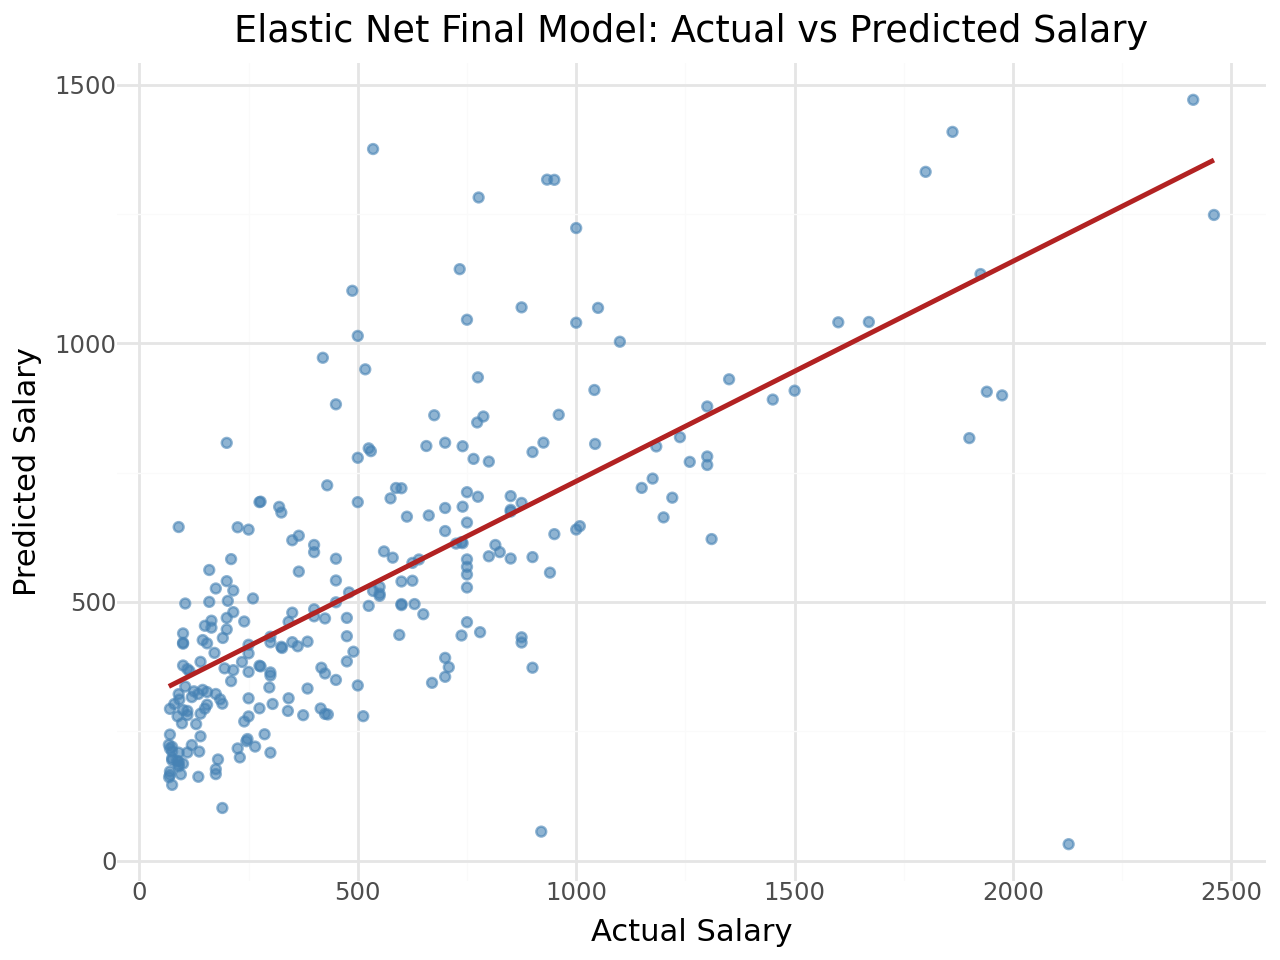

In [156]:
# Fit final Elastic Net model on full dataset
enet_final.fit(X_final, y_final)
y_pred = enet_final.predict(X_final)

import plotnine as p9
#Creating a plot for the data
(
    p9.ggplot(pd.DataFrame({'Actual': y_final, 'Predicted': y_pred}),
              p9.aes(x='Actual', y='Predicted'))
    + p9.geom_point(color="steelblue", alpha=0.6)
    + p9.geom_smooth(method='lm', se=False, color="firebrick")
    + p9.labs(
        title="Elastic Net Final Model: Actual vs Predicted Salary",
        x="Actual Salary",
        y="Predicted Salary"
    )
    + p9.theme_bw()
)


The results and the plot show that most of our predicted salaries fall close to our regression line, indicating that the elastic Net model is capturing the overall data trend fairly well, at least the best of any of the models. There are players with high salaries potentially more spread, meaning the model might underpredict at the highest salaires. However, overall the model provides pretty consistently accurate predictions, and is the best I could make from the attempts.